# Project: Investigate a Dataset (FBI Gun Data)

### by Oluwatobi Adebanwo

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#websites">Websites</a></li>
</ul>


img_prediction['p1_config'] = (img_prediction.p1_conf * 100).round(0).astype(float)

<a id='intro'></a>
## Introduction

The [FBI Gun Data](https://www.google.com/url?q=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FNovember%2F5a0a5623_ncis-and-census-data%2Fncis-and-census-data.zip&sa=D&source=docs) used in this project comes from the FBI's National Instant Criminal Background Check Sysytem. This dataset has been supplemented with state level data from [census.gov](https://www.census.gov/). 
This Dataset includes two (2) sets of data : **NICS** data and the **U.S. census data**.
 
The National Instant Criminal Background Check System (NCIS) data stored in an .xlsx file is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials.

Each column represent a type of transaction submitted to the NCIS. In addition each type of transaction is broken down by the type of firearm -- handgun, long gun and others.
These set of transactions are used to **estimate sales** accross states:
- Handgun : any firearm having short stock and designed to be held fired by use of a single hand.
- Long gun : a weapon designed to be fired from the shoulder.
- Other : refers to frames, receivers and other firearms neither handgun nor longun(rifles or short gun).

Other sets of transaction are majorly just **background checks** initiated by an officially-licensed Federal Firearms Licensee (FFL) or ciminal justice law enforcement agency. They include:

- multiple : background check for more than one fire arm.
- admin : administrative checks that are for other uses of NCIS.
- other background checks include pre-pawned, redemption, rentals, returned, private sale, return to seller-private sale.



The [U.S census data](https://www.census.gov/) found in a .csv file contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

## Research Questions

The following questions arrive from the FBI Gun Data

1. What is the overall trend of gun purhases?
2. Which states have had the highest growth in gun registrations?
3. What observation can be made from the overall yealry background check?
4. What observation is seen between background check and gun purchase in each state?

In [426]:
# import python packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

This section invloves Loading the Data for trimming, cleaning and inspection to understand the structure and figure out changes to be made.

### General Properties (NCIS Gun Data)

In [450]:
# Load the gun_data with pandas using an extension of .xlsx
df = pd.read_excel('gun_data.xlsx')
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [451]:
# end of table to confirm year and month
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [452]:
# check for data types and columns with non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [453]:
# number of rows and columns
df.shape

(12485, 27)

In [454]:
# check for summary statistics (mean, maximum and minimum values e.t.c)
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### Summary Statistics of the FBI Gun Data

The FBI_gun data contains 12485 entries with 27 columns. This dataset covers gun data from November 1998 to July 2022 across various states in the U.S.A.
From the statistics we can see that;
- Sales estimate ranges from an average of 5940 handgun, 9309 long gun and 1349 for other forms of fire arms. There by showing that long gun has the highest purchase over this period of time.
- An average of 6413 firearms having permit was transacted with an average of 1165 permit rechecked.
- A Total of 23 Columns with unknown values.


###  FBI Gun Data Cleaning

In [455]:
# fill unkown values with the mean of numeric datas
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\3402470276.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


### General Properties (US Census Data)

In [284]:
# Load the US census data with pandas using an extension of .csv
dg = pd.read_csv('US_census_data.csv')
dg.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [285]:
# number of rows and column
dg.shape

(85, 52)

In [286]:
# check for summary statistics
dg.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [287]:
# check for non values and data type
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Summary Statistics of the US Census Data

The US Census data contains 85 entries with 52 columns. This dataset contains varialbes having one data point per state, mostly for 2016
They contain facts about population estimates for each states
From the statistics we can see that
- They are 83 states with all the states having some unknown values

In [288]:
# drop column not needed
dg.drop(['Fact Note'], axis=1, inplace=True)
dg.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### US Census Data Cleaning

In [289]:
# check for columns with null values to be dropped
dg.isnull()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
81,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
82,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
83,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [290]:
# drop null values for string data type
dg.dropna(inplace=True)
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [291]:
# cleaned US Census data
dg.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is cleaned, I moved on to exploration, statistics computations and creation of visualizations with the goal of addressing the research questions posed in the Introduction section. 

### Research Question 1 (Overall trend of Gun purchases?)

Overall trend of gun purchases is answered using the sales estimate across states over the given period of time.
and these sales estmate are valued using the Handgun, Long gun and other(rifles or short gun) data.

In [456]:
# list of columns
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [457]:
# select columns needed from fbi gun data, these columns estimate gun purchases
df_g = df[['month', 'state', 'handgun', 'long_gun', 'other']]
df_g.head()

,month,state,handgun,long_gun,other
0,2017-09,Alabama,5734.0,6320.0,221.0
1,2017-09,Alaska,2320.0,2930.0,219.0
2,2017-09,Arizona,11063.0,7946.0,920.0
3,2017-09,Arkansas,4347.0,6063.0,165.0
4,2017-09,California,37165.0,24581.0,2984.0


In [458]:
# creating a new column 'year' extracting year data only from column 'month'
date_col = pd.DatetimeIndex(df['month'])
df_g['year'] = date_col.year
df_g.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\2625885215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['year'] = date_col.year


,month,state,handgun,long_gun,other,year
0,2017-09,Alabama,5734.0,6320.0,221.0,2017
1,2017-09,Alaska,2320.0,2930.0,219.0,2017
2,2017-09,Arizona,11063.0,7946.0,920.0,2017
3,2017-09,Arkansas,4347.0,6063.0,165.0,2017
4,2017-09,California,37165.0,24581.0,2984.0,2017


In [459]:
# sum of fire arms or gun purchases
sum_of_firearms = ['handgun', 'long_gun', 'other']
df_g['gun_purchases'] = df_g[sum_of_firearms].sum(axis=1)
df_g.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\3571119538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['gun_purchases'] = df_g[sum_of_firearms].sum(axis=1)


,month,state,handgun,long_gun,other,year,gun_purchases
0,2017-09,Alabama,5734.0,6320.0,221.0,2017,12275.0
1,2017-09,Alaska,2320.0,2930.0,219.0,2017,5469.0
2,2017-09,Arizona,11063.0,7946.0,920.0,2017,19929.0
3,2017-09,Arkansas,4347.0,6063.0,165.0,2017,10575.0
4,2017-09,California,37165.0,24581.0,2984.0,2017,64730.0


In [460]:
# columns not needed are dropped  
df_g.drop(['month', 'handgun', 'long_gun', 'other'], axis = 1, inplace = True)
df_g.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\3541528492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g.drop(['month', 'handgun', 'long_gun', 'other'], axis = 1, inplace = True)


,state,year,gun_purchases
0,Alabama,2017,12275.0
1,Alaska,2017,5469.0
2,Arizona,2017,19929.0
3,Arkansas,2017,10575.0
4,California,2017,64730.0


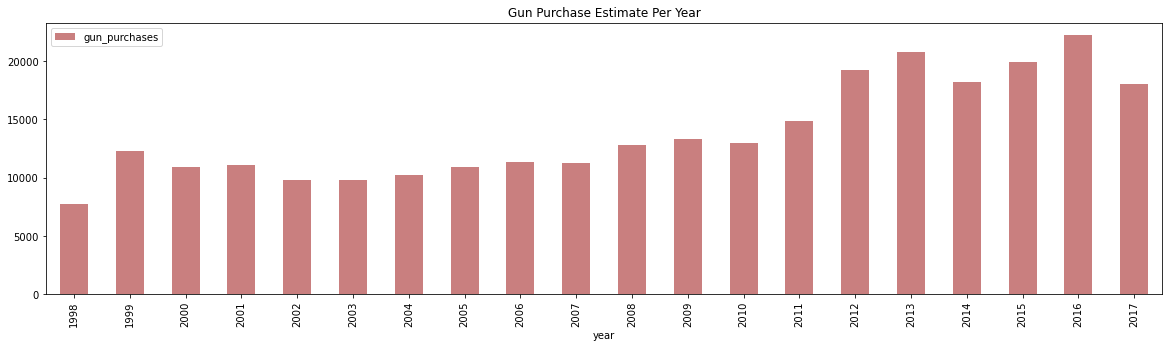

In [567]:
# bar chart showing gun purchase estimate per year
df_g.groupby('year').mean().plot(kind= 'bar', figsize=(20,5), alpha = 0.6, color= 'brown')
plt.title('Gun Purchase Estimate Per Year'), plt.legend();

From the bar chart above, we can see that year 2016 had an estimate of over 20000 Gun purchase which is also the highest estimate over this period of time. Year 1998 having the lowest with an estimate of over 5000.

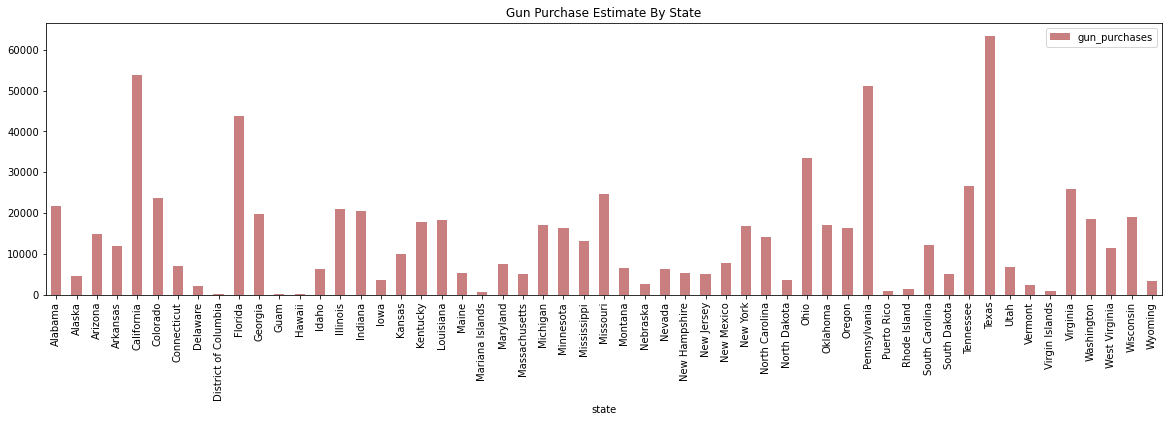

In [566]:
# bar chart showing total gun purchases by state
df_g.groupby('state').gun_purchases.mean().plot(kind='bar',figsize=(20,5), alpha = 0.6, color= 'brown')
plt.title('Gun Purchase Estimate By State'), plt.legend();

States like Texas, California and Pennsylvania had a high Gun purchase estimate of over 5000. Texas was the highest. While states like Guam Hawaii and District of columbia had a very low gun purchase estimate over this given period of time.

### Research Question 2  (Which states have had the highest growth in gun registrations?)

In [463]:
# select columns needed from fbi gun data
df_y = df[['state', 'totals', 'month']]
df_y.head()

,state,totals,month
0,Alabama,32019,2017-09
1,Alaska,6303,2017-09
2,Arizona,28394,2017-09
3,Arkansas,17747,2017-09
4,California,123506,2017-09


In [464]:
# extract year from date format
date_col = pd.DatetimeIndex(df['month'])
df_y.loc[:,'year'] = date_col.year
df_y.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\1290525586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y.loc[:,'year'] = date_col.year


,state,totals,month,year
0,Alabama,32019,2017-09,2017
1,Alaska,6303,2017-09,2017
2,Arizona,28394,2017-09,2017
3,Arkansas,17747,2017-09,2017
4,California,123506,2017-09,2017


In [465]:
# create new dataframe secting columns needed
df_growth = df_y[['state', 'totals', 'year']]
df_growth.head()

,state,totals,year
0,Alabama,32019,2017
1,Alaska,6303,2017
2,Arizona,28394,2017
3,Arkansas,17747,2017
4,California,123506,2017


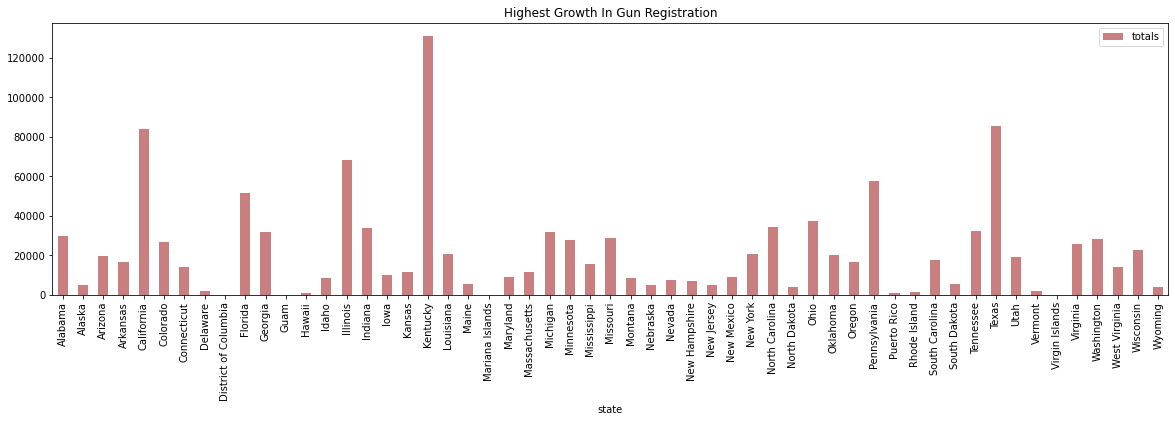

In [568]:
# bar chart showing states with highest gun registration
df_growth.groupby('state').totals.mean().plot(kind='bar', figsize=(20,5), alpha = 0.6, color= 'brown')
plt.title('Highest Growth In Gun Registration'), plt.legend();

This chart showed states with highest growth in gun registration over this period of time. Kentucky had the highest gun registration of over 120000 on average. States having lowest growth in gun registration include Guam, Hawaii, District of colombia amongst others.

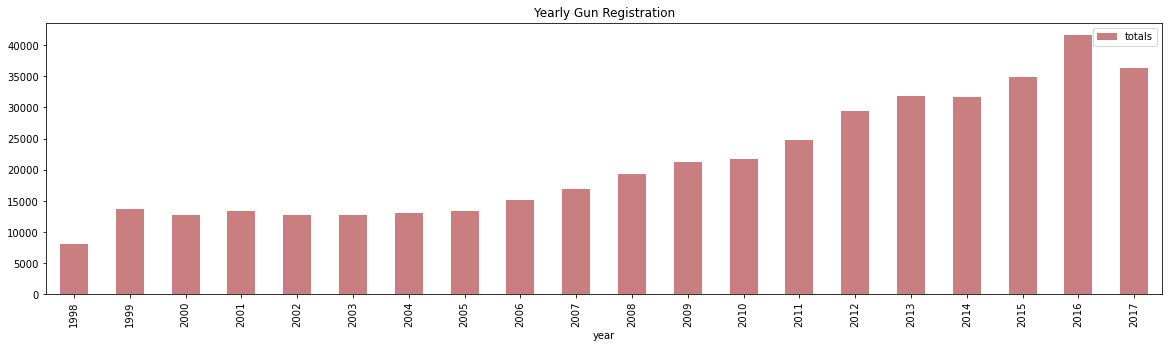

In [570]:
# bar chart to show yearly gun registartion
df_growth.groupby('year').totals.mean().plot(kind='bar', figsize=(20,5), alpha = 0.6, color= 'brown')
plt.title('Yearly Gun Registration'), plt.legend();

The chart above describes the yearly gun registration with 2016 having the highest and 1998 having the lowest record in gun registration

### Research Question 3 (What observation can be made from the overall yealry background check?)

In [486]:
# gun data preview
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [477]:
# list of columns
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [487]:
# create new dataframe selecting columns needed for analysis
df_b = df[['month', 'state','permit', 'permit_recheck','multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']]
df_b.head()

,month,state,permit,permit_recheck,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
0,2017-09,Alabama,16717.0,0.0,317,0.0,15.0,21.0,2.0,1378.0,...,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0
1,2017-09,Alaska,209.0,2.0,160,0.0,5.0,2.0,0.0,200.0,...,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0
2,2017-09,Arizona,5069.0,382.0,631,0.0,13.0,6.0,0.0,1474.0,...,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0
3,2017-09,Arkansas,2935.0,632.0,366,51.0,12.0,13.0,0.0,1296.0,...,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0
4,2017-09,California,57839.0,0.0,0,0.0,0.0,0.0,0.0,535.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [488]:
# create new column for total background checks
df_b['background_check'] = df_b.sum(axis=1,skipna=False)
df_b.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\2288107647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_b['background_check'] = df_b.sum(axis=1,skipna=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_9060\2288107647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['background_check'] = df_b.sum(axis=1,skipna=False)


,month,state,permit,permit_recheck,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,background_check
0,2017-09,Alabama,16717.0,0.0,317,0.0,15.0,21.0,2.0,1378.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,19744.0
1,2017-09,Alaska,209.0,2.0,160,0.0,5.0,2.0,0.0,200.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,834.0
2,2017-09,Arizona,5069.0,382.0,631,0.0,13.0,6.0,0.0,1474.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,8465.0
3,2017-09,Arkansas,2935.0,632.0,366,51.0,12.0,13.0,0.0,1296.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,7172.0
4,2017-09,California,57839.0,0.0,0,0.0,0.0,0.0,0.0,535.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58776.0


In [489]:
# drop unwanted columns
df_b.drop(['permit', 'permit_recheck','multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1, inplace = True)
df_b.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\728930822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b.drop(['permit', 'permit_recheck','multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',


,month,state,background_check
0,2017-09,Alabama,19744.0
1,2017-09,Alaska,834.0
2,2017-09,Arizona,8465.0
3,2017-09,Arkansas,7172.0
4,2017-09,California,58776.0


In [490]:
# extracting year from date format
date_col = pd.DatetimeIndex(df['month'])
df_b['year'] = date_col.year
df_b.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9060\4160574655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['year'] = date_col.year


,month,state,background_check,year
0,2017-09,Alabama,19744.0,2017
1,2017-09,Alaska,834.0,2017
2,2017-09,Arizona,8465.0,2017
3,2017-09,Arkansas,7172.0,2017
4,2017-09,California,58776.0,2017


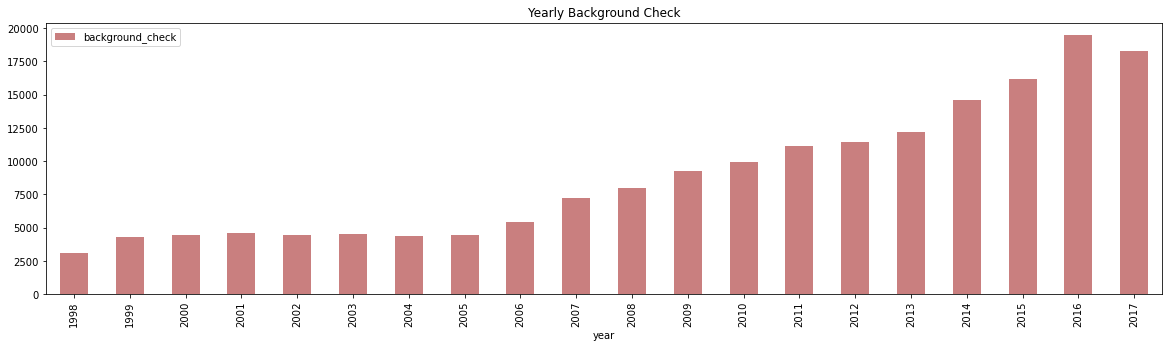

In [571]:
# bar chart to show yearly background check
df_b.groupby('year').background_check.mean().plot(kind='bar', figsize=(20,5), alpha = 0.6, color= 'brown'),
plt.title('Yearly Background Check'); plt.legend();

This chart shows that Yearly background check increased over the years but dropped in year 2017, with year 2016 having the highest record of an average of 20000 background checks in fire arms and year 1998 having the lowest record of fire arm background checks

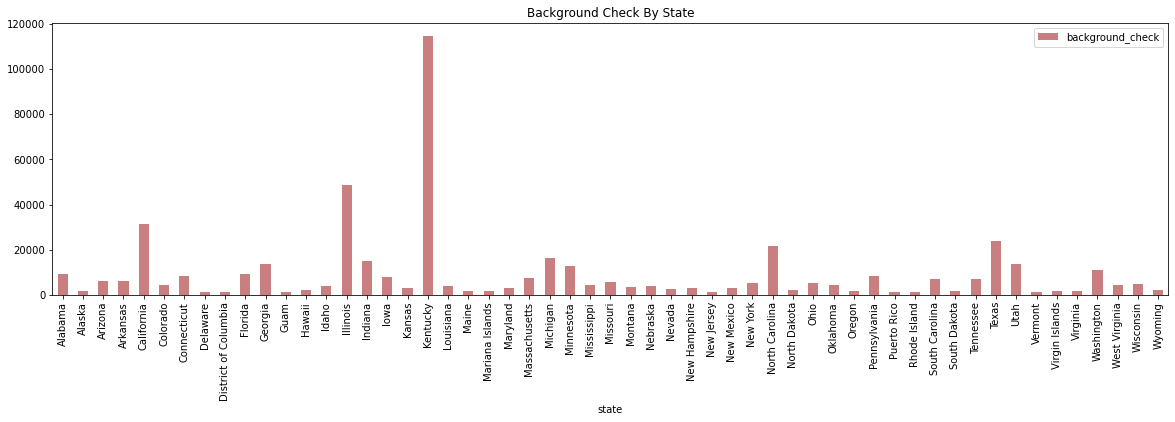

In [572]:
# bar chart to show background check in each state
df_b.groupby('state').background_check.mean().plot(kind='bar', figsize=(20,5), alpha = 0.6, color= 'brown')
plt.title('Background Check By State'), plt.legend();

Background check by states shows that kentucky had the highest record of fire arm background check having an average of close to 120000 record and second highest was illinois having an average of close to 60000. Generally other states had a low background check in fire arm compared to kentucky and illinois.

### Research Question 4 (What observation is seen between background check and gun purchase in each state?)

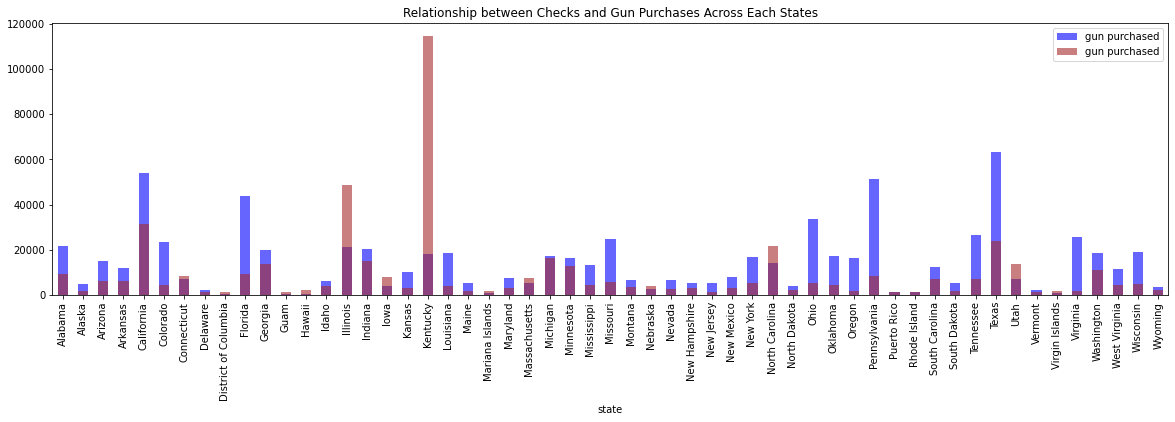

In [558]:
# 2d visualization to show relationship between gun purchased and background checks in each state
df_g.groupby('state').gun_purchases.mean().plot(kind='bar',figsize=(20,5), alpha = 0.6, color= 'blue', label = 'gun purchased')
df_b.groupby('state').background_check.mean().plot(kind='bar', figsize=(20,5), alpha = 0.6, color= 'brown', label = 'gun purchased')
plt.title('Relationship between Checks and Gun Purchases Across Each States')
plt.legend();

It can be seen that states like kentucky had a higher percentage of background checks to gun purchased while state like virgina, pennsylvannia, Texas, Ohio, Florida had hire percentage of gun purchased comapared to background checks. States like this are prone to higher crime rate

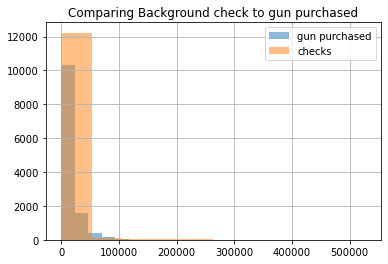

In [556]:
# compare gun purchase estimate and checks using histogram
df_g['gun_purchases'].hist(alpha=0.5, label='gun purchased')
df_b['background_check'].hist(alpha=0.5, label='checks'), plt.title('Comparing Background check to gun purchased')
plt.legend();

The histogram shows that a larger percentage of fire arms was checked across this period compared to gun purchased.

<a id='conclusions'></a>
## Conclusions

After the analysis done. It can be seen that highest gun purchase happened in year 2016 and 1998 having the lowest gun purchase. Among the states Texas, with an average of over 10,000 had the highest gun purchase with california having the second highest purchase. States with the lowest gun purchase include Hawaii, Guam and District of columbia with an average less than 2000.

Analysis on Gun registration shows that Kentucky State had the highest gun registration with california and texas in next and also 2016 and 1998 having the maximum ad minimun gun registration respectively.
This shows there is a correlation with gun registered and sales estimate in year 2016, also in year 1998.

Kentucky had the highest gun background checks thereby shwoing a correlation with gun registered. Also 2016 had the highest background checks.
States like Texas had a low background check of over 2000 compared to gun purchased of over 10,000. States like this are prone to high crime rate.
Final conclusion, statistics show gun purchase, registration and background checks occured in year 2016.

### Limitations

Some limitations encountered was filling the unknown values in the FBI gun data using the mean. This will likely affect results and predictions. This would lead to biased or inaccurate analysis.

<a id='websites'></a>
## Websites

- https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md

- https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view
